# Airplane Seats

An airplane has 20 seats numbered from 1 to 20, and each of 20 passengers has an assigned seat. Everyone queues up in a civil fashion except for one knucklehead, who pushes his way to the front of the line. Then, without even looking at his seat assignment, he boards and sits wherever he feels like sitting. Then the others board. If their assigned seats are open, they sit there; otherwise, they choose an open seat at random. 

What is the probability that the nth person's assigned seat is open?

In [5]:
import random
import matplotlib.pyplot as plt
%matplotlib inline

### Monte Carlo Solution

In [133]:
class airplane_seats():

    def __init__(self, seats=20):
        self.seats = seats
        
    def calc_prob(self, n, iters=1000):
        """Calculate probability that nth passenger's seat is open using
        Monte Carlo simulation"""
        
        assert n <= self.seats, "nth passenger exceeds number of seats"

        # add 1 if nth seat open, nothing if not
        times_open = 0
        all_seats = set(range(1, self.seats+1))
        
        for i in range(iters):
            # print("\nRound", i+1)
            taken_seats = set()
            
            # first passenger randomly chooses a seat
            first_seat = random.choice(range(1, self.seats+1))
            if first_seat == 1 or first_seat > n:
                # print("Passenger 1 takes seat", first_seat)
                # print(f"Seat {n} available")
                times_open += 1
                continue
            elif first_seat == n:
                # print("Passenger 1 takes seat", first_seat)
                # print(f"Seat {n} taken")
                continue
            else:
                # print("Passenger 1 takes seat", first_seat)
                taken_seats.add(first_seat)
                
            # next passengers
            for seat in range(2, n):
                if seat in taken_seats:
                    remaining_seats = all_seats - taken_seats
                    taken = random.choice(tuple(remaining_seats))
                else:
                    taken = seat
                # print(f"Passenger {seat} takes seat {taken}")
                taken_seats.add(taken)
                    
            if n not in taken_seats:
                times_open += 1
                # print(f"Seat {n} available")
            else:
                # print(f"Seat {n} taken")
                pass
                
        return times_open / iters

    
    def fit(self, iters=1000):
        """Calculates and stores probabilities for each nth passenger"""
    
        self.probs = []
    
        for i in range(1, self.seats+1):
            print(f"\rCalculating passenger {i} probability", end="")
            prob = self.calc_prob(i, iters=iters)
            self.probs.append(prob)
        
        print("\rDone!                                     ")

    
    def print_probs(self):
        """Prints report of probabilities for each passenger"""
        
        if len(self.probs) == 0:
            print("Run self.fit() first")
            return None
        
        print("\t\tPROB")
        for i, prob in enumerate(self.probs, 1):
            print(f"Passenger {i}:\t{prob:.3f}")            

In [134]:
airplane_20 = airplane_seats()
airplane_20.seats

20

In [135]:
airplane_20.fit(1000000)

Done!                                     


In [136]:
airplane_20.print_probs()

		PROB
Passenger 1:	1.000
Passenger 2:	0.950
Passenger 3:	0.947
Passenger 4:	0.944
Passenger 5:	0.942
Passenger 6:	0.938
Passenger 7:	0.933
Passenger 8:	0.928
Passenger 9:	0.923
Passenger 10:	0.917
Passenger 11:	0.909
Passenger 12:	0.900
Passenger 13:	0.889
Passenger 14:	0.875
Passenger 15:	0.858
Passenger 16:	0.833
Passenger 17:	0.800
Passenger 18:	0.750
Passenger 19:	0.668
Passenger 20:	0.500


''

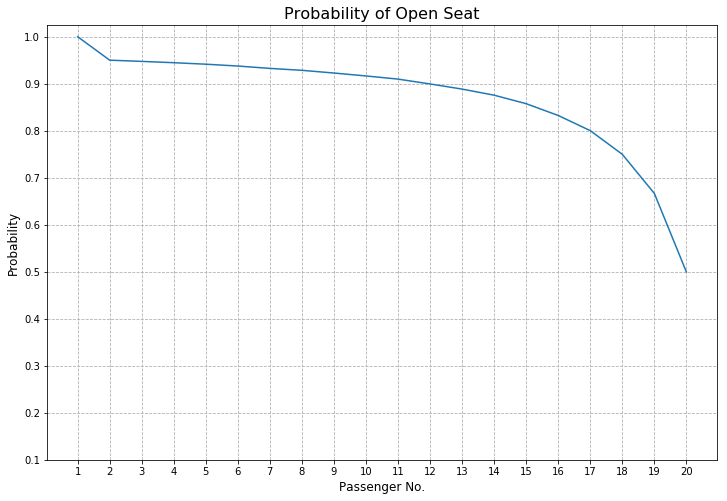

In [116]:
x = range(1,21)
y = airplane_20.probs

plt.figure(figsize=(12,8))
plt.plot(x, y)
plt.xticks(x)
plt.yticks([0.1*i for i in range(1,11)])
# plt.ylim([0,1])
plt.grid(linestyle='--')
plt.xlabel("Passenger No.", fontsize=12)
plt.ylabel("Probability", fontsize=12)
plt.title("Probability of Open Seat", fontsize=16)
;

### Analytic Solution

The first passenger's seat will always be free; this is clear enough:  
`P(1) = 1`

The second passenger's seat will be free as long as the first didn't sit in it:  
`P(2) = 1 - 1/20 = 19/20`

Now it starts to get tricky. The third passenger's seat will be free unless 1) P1 sits in S3, or 2) P1 sits in S2 and P2 sits in S3:  
`P(3) = 1 - 1/20 - (1/20 * 1/19)`  
`P(3) = 380/380 - 19/380 - 1/380`  
`P(3) = 360/380 = 18/19`

The fourth's will be free unless 1) P1 sits in S4, 2) P1 sits in S2 and P2 sits in S4, 3) P1 sits in S3 and P3 sits in S4, or 4) P1 sits in S2 and P2 sits in S3 and P3 sits in S4:  
`P(4) = 1 - 1/20 - (1/20 * 1/19) - (1/20 * 1/18) - (1/20 * 1/19 * 1/18)`  
`P(4) = 6840/6840 - 342/6840 - 18/6840 - 19/6840 - 1/6840`  
`P(4) = 6460/6840 = 17/18`

The fifth's will be free unless 1) P1 sits in S, 2) P1 sits in S2 and P2 sits in S5, 3) P1 sits in S3 and P3 sits in S5, 4) P1 sits in S4 and P4 sits in S5, 5) P1 sits in S2 and P2 sits in S3 and P3 sits in S5, 6) P1 sits in S2 and P2 sits in S4 and P4 sits in S5, 7) P1 sits in S3 and P3 sits in S4 and P4 sits in S5, 8) P1 sits in S2 and P2 sits in S3 and P3 sits in S4 and P4 sits in S5:  
`P(5) = 1 - 1/20 - (1/20 * 1/19) - (1/20 * 1/18) - (1/20 * 1/17) - (1/20 * 1/19 * 1/18) - (1/20 * 1/19 * 1/17) - (1/20 * 1/18 * 1/17) - (1/20 * 1/19 * 1/18 * 1/17)`  

Saving some steps, this simplifies to:  
`P(5) = 16/17`  

Clearly there's a pattern here. A quick check to see if this squares with the Monte Carlo simulation...

In [137]:
print("Pass.\tP (An)\tP (MC)")
print("-" * 24)
for i in range(2,21):
    p = (20 - (i - 1)) / (20 - (i - 2))
    print(f"P{i}:\t{p:.3f}\t{airplane_20.probs[i-1]:.3f}")

Pass.	P (An)	P (MC)
------------------------
P2:	0.950	0.950
P3:	0.947	0.947
P4:	0.944	0.944
P5:	0.941	0.942
P6:	0.938	0.938
P7:	0.933	0.933
P8:	0.929	0.928
P9:	0.923	0.923
P10:	0.917	0.917
P11:	0.909	0.909
P12:	0.900	0.900
P13:	0.889	0.889
P14:	0.875	0.875
P15:	0.857	0.858
P16:	0.833	0.833
P17:	0.800	0.800
P18:	0.750	0.750
P19:	0.667	0.668
P20:	0.500	0.500


Nearly perfect at 3 sig-digs!